## Distribution of Propogation Times for Gossip Protocol

This is the distribution of propagation times from this simulator ranging for 10, 30, 50, 70 and 100 nodes using GKE. The specifications of this test are:-
- **Locattion type**: Zonal
- **Total Memory**: 24GB
- **Total vCPUs**: 12
- **Total Nodes**: 6
- **Tier**: Standard
- **Location**: us-central1

All data (results) generated from this gossip test distribution can be downloaded [here](https://drive.google.com/drive/folders/1KenEIuXyKxsMBPBCz3GsbGu92vBQbqnP?usp=sharing).

In [ ]:
import pandas as pd
import numpy as np
import json, re
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Point this to google drive where all results are stored
# Results can be found from :
%cd /content/drive/My Drive/Colab Notebooks/bcgossip/sim/gpbc/cnsim/results

/content/drive/My Drive/Colab Notebooks/bcgossip/sim/gpbc/cnsim/results


In [ ]:
## Propagation times with wastage (duplication) for 10 Nodes
## Group by message
# source :

# Load data
data = pd.read_csv('nodes10_Mar102025195724_Full1.0-2493-100X-zonal.csv')
# data

# Convert 'received_timestamp' from nanoseconds to milliseconds
data['received_timestamp'] = data['received_timestamp'] / 1e6  # Convert to milliseconds

# Group by 'message' and find the min and max timestamps within each group
min_timestamps = data.groupby('message')['received_timestamp'].min()
max_timestamps = data.groupby('message')['received_timestamp'].max()

# Calculate propagation times in milliseconds
propagation_times = max_timestamps - min_timestamps

# Check to ensure we now have a Series of propagation times
print("Calculated Propagation Times:")
print(propagation_times)

# Compute statistical values
if not propagation_times.empty:
    stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
    print("Statistical Summary:")
    print(stats)
else:
    print("No propagation times calculated. Check your data or message extraction.")

Calculated Propagation Times:
message
nodes10_Mar102025195724_Full1.0-2493-1      329.227295
nodes10_Mar102025195724_Full1.0-2493-10     359.666016
nodes10_Mar102025195724_Full1.0-2493-100    334.050293
nodes10_Mar102025195724_Full1.0-2493-11     356.219482
nodes10_Mar102025195724_Full1.0-2493-12     326.763916
                                               ...    
nodes10_Mar102025195724_Full1.0-2493-95     359.662842
nodes10_Mar102025195724_Full1.0-2493-96     344.020020
nodes10_Mar102025195724_Full1.0-2493-97     328.795654
nodes10_Mar102025195724_Full1.0-2493-98     346.474854
nodes10_Mar102025195724_Full1.0-2493-99     358.960449
Name: received_timestamp, Length: 100, dtype: float64
Statistical Summary:
mean      341.067883
median    340.666016
max       486.823730
var       416.467166
std        20.407527
Name: received_timestamp, dtype: float64


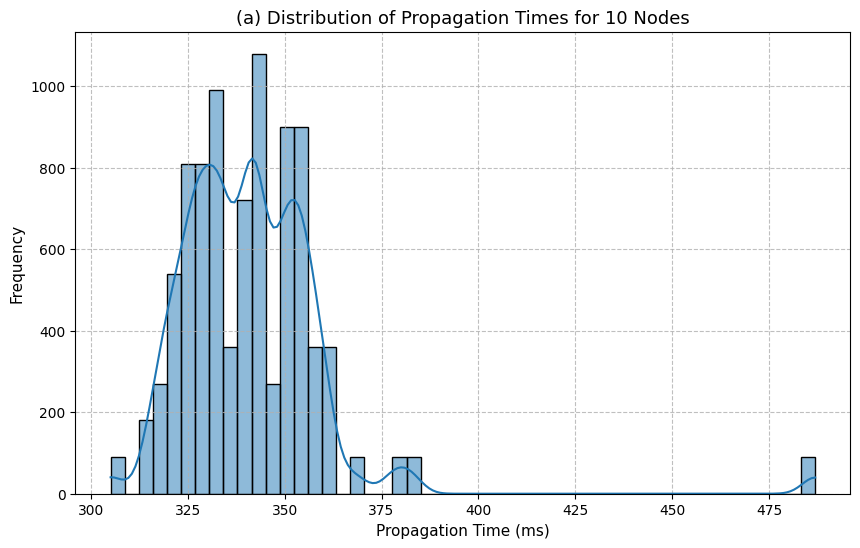

In [ ]:
## Distribution of Propagation times with wastage (duplication) for 10 Nodes
## Group by message.

# Load your data
data = pd.read_csv('nodes10_Mar102025195724_Full1.0-2493-100X-zonal.csv')

# Prepare data
data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

# Calculate propagation times in milliseconds for each message
data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
    lambda x: (x.max() - x.min()).total_seconds() * 1000
)

# Visualize the distribution of propagation times
plt.figure(figsize=(10, 6))
sns.histplot(data['propagation_time_ms'], bins=50, kde=True) # KDE will add a density plot
plt.title('(a) Distribution of Propagation Times for 10 Nodes', fontsize=13)
plt.xlabel('Propagation Time (ms)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [ ]:
## Propagation times with wastage (duplication) for 30 Nodes
## Group by message

# Load data
data = pd.read_csv('nodes30_Mar112025160405_Full1.0-2a5b-100X-zonal.csv')

# Convert 'received_timestamp' from nanoseconds to milliseconds
data['received_timestamp'] = data['received_timestamp'] / 1e6  # Convert to milliseconds

# Group by 'message' and find the min and max timestamps within each group
min_timestamps = data.groupby('message')['received_timestamp'].min()
max_timestamps = data.groupby('message')['received_timestamp'].max()

# Calculate propagation times in milliseconds
propagation_times = max_timestamps - min_timestamps

# Check to ensure we now have a Series of propagation times
print("Calculated Propagation Times:")
print(propagation_times)

# Compute statistical values
if not propagation_times.empty:
    stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
    print("Statistical Summary:")
    print(stats)
else:
    print("No propagation times calculated. Check your data or message extraction.")

Calculated Propagation Times:
message
nodes30_Mar112025160405_Full1.0-2a5b-1      3181.921875
nodes30_Mar112025160405_Full1.0-2a5b-10     3152.510498
nodes30_Mar112025160405_Full1.0-2a5b-100    3255.969238
nodes30_Mar112025160405_Full1.0-2a5b-11     3265.757812
nodes30_Mar112025160405_Full1.0-2a5b-12     3098.470947
                                               ...     
nodes30_Mar112025160405_Full1.0-2a5b-95     3139.526855
nodes30_Mar112025160405_Full1.0-2a5b-96     3124.483154
nodes30_Mar112025160405_Full1.0-2a5b-97     3253.586182
nodes30_Mar112025160405_Full1.0-2a5b-98     3043.114014
nodes30_Mar112025160405_Full1.0-2a5b-99     3140.769775
Name: received_timestamp, Length: 100, dtype: float64
Statistical Summary:
mean       3192.987917
median     3172.154663
max        3587.558350
var       12554.752925
std         112.047994
Name: received_timestamp, dtype: float64


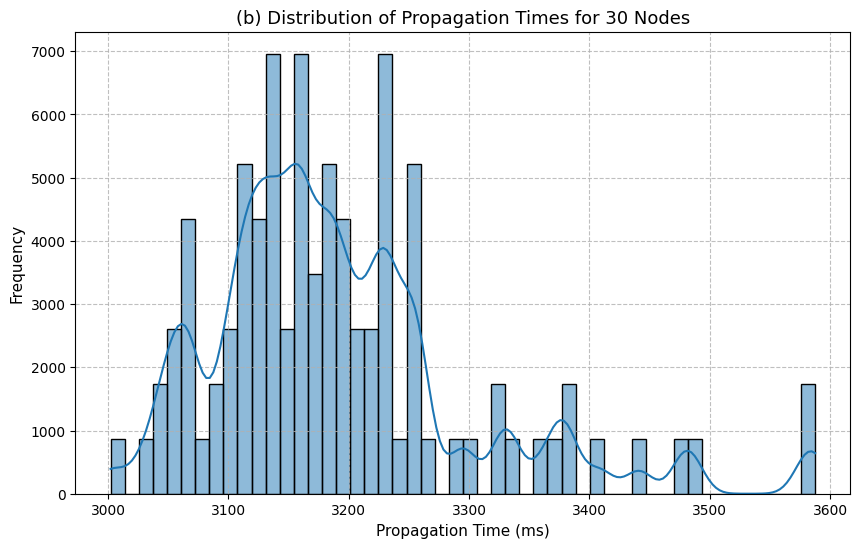

In [ ]:
## Distribution of Propagation times with wastage (duplication) for 30 Nodes
## Group by message.

# Load your data
data = pd.read_csv('nodes30_Mar112025160405_Full1.0-2a5b-100X-zonal.csv')

# Prepare data
data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

# Calculate propagation times in milliseconds for each message
data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
    lambda x: (x.max() - x.min()).total_seconds() * 1000
)

# Visualize the distribution of propagation times
plt.figure(figsize=(10, 6))
sns.histplot(data['propagation_time_ms'], bins=50, kde=True) # KDE will add a density plot
plt.title('(b) Distribution of Propagation Times for 30 Nodes', fontsize=13)
plt.xlabel('Propagation Time (ms)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [ ]:
## Propagation times with wastage (duplication) for 50 Nodes
## Group by message

# Load data
data = pd.read_csv('nodes50_Mar102025195742_Full1.0-9e9c-100X.csv')

# Convert 'received_timestamp' from nanoseconds to milliseconds
data['received_timestamp'] = data['received_timestamp'] / 1e6  # Convert to milliseconds

# Group by 'message' and find the min and max timestamps within each group
min_timestamps = data.groupby('message')['received_timestamp'].min()
max_timestamps = data.groupby('message')['received_timestamp'].max()

# Calculate propagation times in milliseconds
propagation_times = max_timestamps - min_timestamps

# Check to ensure we now have a Series of propagation times
print("Calculated Propagation Times:")
print(propagation_times)

# Compute statistical values
if not propagation_times.empty:
    stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
    print("Statistical Summary:")
    print(stats)
else:
    print("No propagation times calculated. Check your data or message extraction.")

Calculated Propagation Times:
message
nodes50_Mar102025195742_Full1.0-9e9c-1      11647.043213
nodes50_Mar102025195742_Full1.0-9e9c-10     11073.492676
nodes50_Mar102025195742_Full1.0-9e9c-100    10959.433350
nodes50_Mar102025195742_Full1.0-9e9c-11     10634.899414
nodes50_Mar102025195742_Full1.0-9e9c-12     10656.772217
                                                ...     
nodes50_Mar102025195742_Full1.0-9e9c-95     10878.759766
nodes50_Mar102025195742_Full1.0-9e9c-96     10753.329590
nodes50_Mar102025195742_Full1.0-9e9c-97     10988.770508
nodes50_Mar102025195742_Full1.0-9e9c-98     10840.677734
nodes50_Mar102025195742_Full1.0-9e9c-99     10735.230957
Name: received_timestamp, Length: 100, dtype: float64
Statistical Summary:
mean      10862.463843
median    10828.574585
max       11686.706787
var       74855.620713
std         273.597552
Name: received_timestamp, dtype: float64


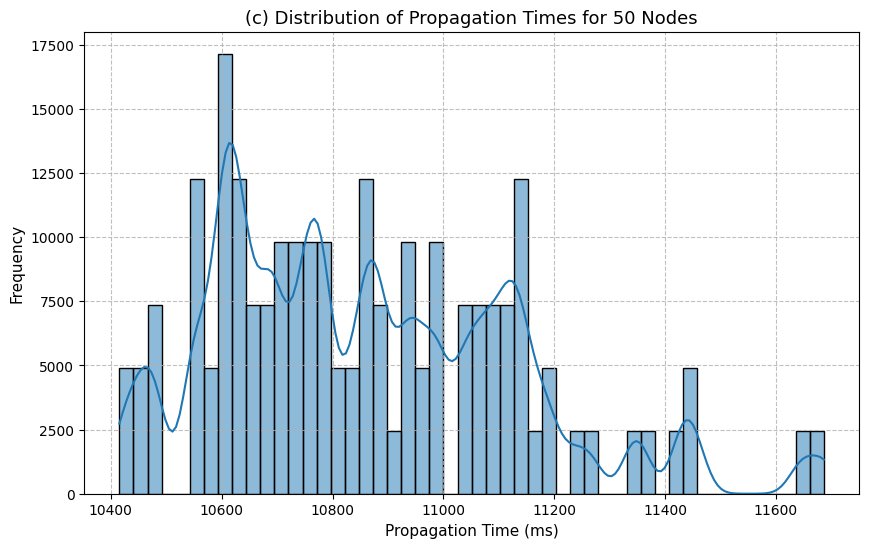

In [ ]:
## Distribution of Propagation times with wastage (duplication) for 50 Nodes
## Group by message.

# Load your data
data = pd.read_csv('nodes50_Mar102025195742_Full1.0-9e9c-100X.csv')

# Prepare data
data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

# Calculate propagation times in milliseconds for each message
data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
    lambda x: (x.max() - x.min()).total_seconds() * 1000
)

# Visualize the distribution of propagation times
plt.figure(figsize=(10, 6))
sns.histplot(data['propagation_time_ms'], bins=50, kde=True) # KDE will add a density plot
plt.title('(c) Distribution of Propagation Times for 50 Nodes', fontsize=13)
plt.xlabel('Propagation Time (ms)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [ ]:
## Propagation times with wastage (duplication) for 70 Nodes
## Group by message

# Load data
data = pd.read_csv('nodes70_Mar112025160431_Full1.0-5869-100X.csv')

# Convert 'received_timestamp' from nanoseconds to milliseconds
data['received_timestamp'] = data['received_timestamp'] / 1e6  # Convert to milliseconds

# Group by 'message' and find the min and max timestamps within each group
min_timestamps = data.groupby('message')['received_timestamp'].min()
max_timestamps = data.groupby('message')['received_timestamp'].max()

# Calculate propagation times in milliseconds
propagation_times = max_timestamps - min_timestamps

# Check to ensure we now have a Series of propagation times
print("Calculated Propagation Times:")
print(propagation_times)

# Compute statistical values
if not propagation_times.empty:
    stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
    print("Statistical Summary:")
    print(stats)
else:
    print("No propagation times calculated. Check your data or message extraction.")

Calculated Propagation Times:
message
nodes70_Mar112025160431_Full1.0-5869-1      18770.907715
nodes70_Mar112025160431_Full1.0-5869-10     19173.186523
nodes70_Mar112025160431_Full1.0-5869-100    19309.197754
nodes70_Mar112025160431_Full1.0-5869-11     20960.749268
nodes70_Mar112025160431_Full1.0-5869-12     19256.360107
                                                ...     
nodes70_Mar112025160431_Full1.0-5869-95     19758.891113
nodes70_Mar112025160431_Full1.0-5869-96     19937.226562
nodes70_Mar112025160431_Full1.0-5869-97     19315.625000
nodes70_Mar112025160431_Full1.0-5869-98     20485.119385
nodes70_Mar112025160431_Full1.0-5869-99     19294.576904
Name: received_timestamp, Length: 100, dtype: float64
Statistical Summary:
mean       19426.313538
median     19333.865112
max        21284.190918
var       353233.288012
std          594.334323
Name: received_timestamp, dtype: float64


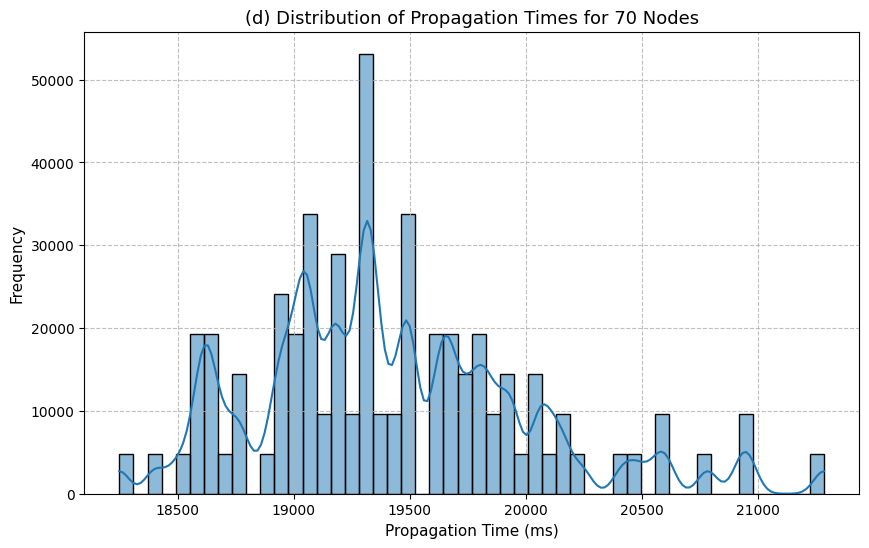

In [ ]:
## Distribution of Propagation times with wastage (duplication) for 70 Nodes
## Group by message.

# Load your data
data = pd.read_csv('nodes70_Mar112025160431_Full1.0-5869-100X.csv')

# Prepare data
data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

# Calculate propagation times in milliseconds for each message
data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
    lambda x: (x.max() - x.min()).total_seconds() * 1000
)

# Visualize the distribution of propagation times
plt.figure(figsize=(10, 6))
sns.histplot(data['propagation_time_ms'], bins=50, kde=True) # KDE will add a density plot
plt.title('(d) Distribution of Propagation Times for 70 Nodes', fontsize=13)
plt.xlabel('Propagation Time (ms)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [ ]:
## Propagation times with wastage (duplication) for 100 Nodes
## Group by message

# Load data
data = pd.read_csv('nodes100_Mar102025195746_Full1.0-9b36-100X.csv')

# Convert 'received_timestamp' from nanoseconds to milliseconds
data['received_timestamp'] = data['received_timestamp'] / 1e6  # Convert to milliseconds

# Group by 'message' and find the min and max timestamps within each group
min_timestamps = data.groupby('message')['received_timestamp'].min()
max_timestamps = data.groupby('message')['received_timestamp'].max()

# Calculate propagation times in milliseconds
propagation_times = max_timestamps - min_timestamps

# Check to ensure we now have a Series of propagation times
print("Calculated Propagation Times:")
print(propagation_times)

# Compute statistical values
if not propagation_times.empty:
    stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
    print("Statistical Summary:")
    print(stats)
else:
    print("No propagation times calculated. Check your data or message extraction.")

Calculated Propagation Times:
message
nodes100_Mar102025195746_Full1.0-9b36-1      47890.341309
nodes100_Mar102025195746_Full1.0-9b36-10     47485.306885
nodes100_Mar102025195746_Full1.0-9b36-100    47954.142334
nodes100_Mar102025195746_Full1.0-9b36-11     48306.841064
nodes100_Mar102025195746_Full1.0-9b36-12     48154.703125
                                                 ...     
nodes100_Mar102025195746_Full1.0-9b36-95     47463.314209
nodes100_Mar102025195746_Full1.0-9b36-96     47353.849121
nodes100_Mar102025195746_Full1.0-9b36-97     46653.483154
nodes100_Mar102025195746_Full1.0-9b36-98     49323.744141
nodes100_Mar102025195746_Full1.0-9b36-99     47895.280762
Name: received_timestamp, Length: 100, dtype: float64
Statistical Summary:
mean      4.798854e+04
median    4.782372e+04
max       5.353503e+04
var       1.576103e+06
std       1.255429e+03
Name: received_timestamp, dtype: float64


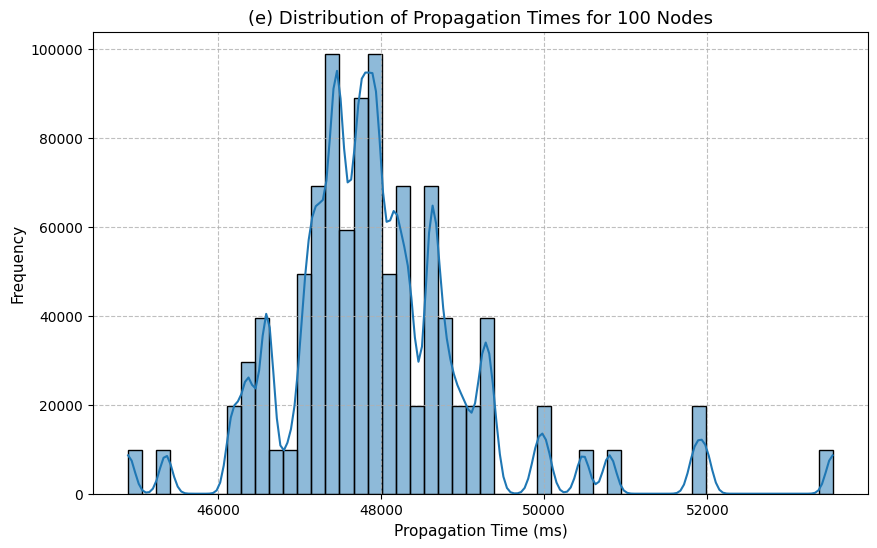

In [ ]:
## Distribution of Propagation times with wastage (duplication) for 100 Nodes
## Group by message.

# Load your data
data = pd.read_csv('nodes100_Mar102025195746_Full1.0-9b36-100X.csv')

# Prepare data
data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

# Calculate propagation times in milliseconds for each message
data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
    lambda x: (x.max() - x.min()).total_seconds() * 1000
)

# Visualize the distribution of propagation times
plt.figure(figsize=(10, 6))
sns.histplot(data['propagation_time_ms'], bins=50, kde=True) # KDE will add a density plot
plt.title('(e) Distribution of Propagation Times for 100 Nodes', fontsize=13)
plt.xlabel('Propagation Time (ms)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()